In [1]:
%pylab inline
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


# Computing the CM 

## Basic approach:

In [2]:
# Random points in a sphere:

r = random.random(1000) 
theta = random.random(1000) * 2 - 1
phi = random.random(1000) * 2 * np.pi

x1 = r**(1/3.0) * sin(arccos(theta)) * sin(phi)
y1 = r**(1/3.0) * sin(arccos(theta)) * cos(phi)
z1 = r**(1/3.0) * theta

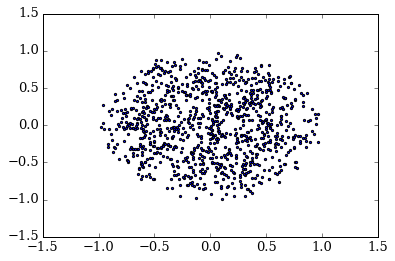

In [3]:
scatter(x1, z1, s=5)

In [4]:
# CM coordinates:
xCM = sum(x1)/len(x1)
yCM = sum(y1)/len(y1)
zCM = sum(z1)/len(z1)

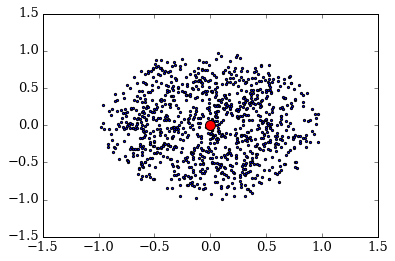

In [5]:
scatter(x1, z1, s=5)
scatter(xCM, zCM, s=100, c='r')

## Iterative approach:


In [211]:
def CM(x, y, z, vx, vy, vz, delta):
    
    N = len(x)
    xCM = sum(x)/len(x)
    yCM = sum(y)/len(y)
    zCM = sum(z)/len(z)

    xCM_new = [xCM]
    yCM_new = [yCM]
    zCM_new = [zCM]
    
    xCM = 0.0
    yCM = 0.0
    zCM = 0.0

    
    vxCM_new = [sum(vx)/N]
    vyCM_new = [sum(vy)/N]
    vzCM_new = [sum(vz)/N]
    R1 = np.sqrt((x - xCM_new)**2 + (y - yCM_new)**2 + (z - zCM_new)**2)
    Rnow = [max(R1)]

    while (np.sqrt((xCM_new[-1]-xCM)**2 + (yCM_new[-1]-yCM)**2 +(zCM_new[-1]-zCM)**2) > delta):
        xCM = xCM_new[-1]
        yCM = yCM_new[-1]
        zCM = zCM_new[-1]
        Rcm = np.sqrt(xCM**2 + yCM**2 + zCM**2)
        R = np.sqrt((x - xCM)**2 + (y - yCM)**2 + (z - zCM)**2)
        Rmax = max(R)
        index = where(R<Rmax/2.0)
        x = x[index]
        y = y[index]
        z = z[index]
        vx = vx[index]
        vy = vy[index]
        vz = vz[index]
        N = len(x)
        xCM_new.append(sum(x)/N)
        yCM_new.append(sum(y)/N)
        zCM_new.append(sum(z)/N)
        vxCM_new.append(sum(vx)/N)
        vyCM_new.append(sum(vy)/N)
        vzCM_new.append(sum(vz)/N)
        Rnow.append(max(np.sqrt((x - xCM_new[-1])**2 + (y - yCM_new[-1])**2 + (z - zCM_new[-1])**2)))

        #scatter(xCM_new, yCM_new)

    print N
    return xCM_new, yCM_new, zCM_new, vxCM_new, vyCM_new, vzCM_new, Rnow

In [95]:
CM(x1, y1, z1, 0, 0, 0, 0.5)


1000


([-0.0055994813038382297],
 [-0.042259406068041232],
 [0.0091327784686695782],
 [0],
 [0],
 [0],
 [])

# Testing the code in a simulation snapshot:

In [8]:
from pygadgetreader import *

In [9]:
positions = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pos', 'dm')
velocities = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'vel', 'dm')
particles_ids = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pid', 'dm')
disk = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pos', 'disk')
vdisk = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'vel', 'disk')
bulge = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pos', 'bulge')
vbulge = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'vel', 'bulge')

#potential = readsnap("../../data/LMCMW/MW1LMC4/snapshots/MW1LMC4_000", 'pot', 'dm')



Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Positions
Returning DISK  Velocities
Returning BULGE Positions
Returning BULGE Velocities


### Finging MW DM particles & LMC DM particles

In [10]:
X = sort(particles_ids)
limit = X[29999]
index_mw = where(particles_ids<=49376)
index_LMC = where(particles_ids>49376)

In [11]:
print X
print limit
print len(X)
print int(len(X)/2.0 - 1.0)

[    1     2     3 ..., 79998 79999 80000]
49376
60000
29999


In [12]:
x_sim_mw = positions[index_mw[0],0]
y_sim_mw = positions[index_mw[0],1]
z_sim_mw = positions[index_mw[0],2]

x_sim_lmc = positions[index_LMC[0],0]
y_sim_lmc = positions[index_LMC[0],1]
z_sim_lmc = positions[index_LMC[0],2]

vx_sim_mw = velocities[index_mw[0],0]
vy_sim_mw = velocities[index_mw[0],1]
vz_sim_mw = velocities[index_mw[0],2]

vx_sim_lmc = velocities[index_LMC[0],0]
vy_sim_lmc = velocities[index_LMC[0],1]
vz_sim_lmc = velocities[index_LMC[0],2]

x_disk = disk[:,0]
y_disk = disk[:,1]
z_disk = disk[:,2]

vx_disk = vdisk[:,0]
vy_disk = vdisk[:,1]
vz_disk = vdisk[:,2]

x_bulge = bulge[:,0]
y_bulge = bulge[:,1]
z_bulge = bulge[:,2]

vx_bulge = vbulge[:,0]
vy_bulge = vbulge[:,1]
vz_bulge = vbulge[:,2]


print len(x_sim_mw), len(x_sim_lmc), len(x_disk), len(x_bulge)

30000 30000 10000 10000


(-20, 20)

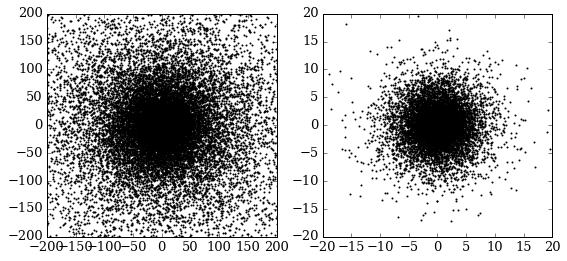

In [13]:
figure(figsize=(14, 4))
subplot(1, 3, 1)
scatter(x_sim_mw, z_sim_mw, s=1.0)
xlim(-200, 200)
ylim(-200, 200)

subplot(1, 3, 2)
scatter(x_disk, y_disk, s=1.0)
xlim(-20, 20)
ylim(-20, 20)

(-200, 200)

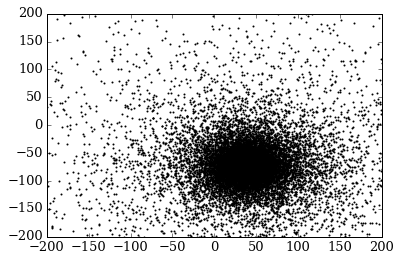

In [14]:
scatter(x_sim_lmc, z_sim_lmc, s=1.0)
xlim(-200, 200)
ylim(-200, 200)

In [117]:
X_sim_mwCM, Y_sim_mwCM, Z_sim_mwCM, vX_sim_mwCM, vY_sim_mwCM, vZ_sim_mwCM = CM(x_sim_mw, y_sim_mw, z_sim_mw, vx_sim_mw, vy_sim_mw, vz_sim_mw, 0.4)
X_sim_lmcCM, Y_sim_lmcCM, Z_sim_lmcCM, vX_sim_lmcCM, vY_sim_lmcCM, vZ_sim_lmcCM  = CM(x_sim_lmc, y_sim_lmc, z_sim_lmc, vx_sim_lmc, vy_sim_lmc, vz_sim_lmc, 0.1)

print X_sim_mwCM[-1], Y_sim_mwCM[-1], Z_sim_mwCM[-1]

7207
7179
-0.134805437164 -0.228039945431 -0.469590179795


In [119]:
X_sim_disk, Y_sim_disk, Z_sim_disk, vX_sim_disk, vY_sim_disk, vZ_sim_disk = CM(x_disk, y_disk, z_disk, vx_disk, vy_disk, vz_disk, 0.01)
X_sim_bulge, Y_sim_bulge, Z_sim_bulge, vX_sim_bulge, vY_sim_bulge, vZ_sim_bulge = CM(x_bulge, y_bulge, z_bulge, vx_bulge, vy_bulge, vz_bulge, 0.01)

print len(X_sim_disk)
print len(X_sim_bulge)
print X_sim_disk[-1], Y_sim_disk[-1], Z_sim_disk[-1]
print X_sim_bulge[-1], Y_sim_bulge[-1], Z_sim_bulge[-1]

9917
9119
2
11
-0.0197111796958 0.0490153971321 0.00252089308577
0.0131956816426 0.0182834612276 0.0418945071545


In [120]:
print vX_sim_mwCM[-1], vY_sim_mwCM[-1], vZ_sim_mwCM[-1]
print vX_sim_disk[-1], vY_sim_disk[-1], vZ_sim_disk[-1]
print vX_sim_bulge[-1], vY_sim_bulge[-1], vZ_sim_bulge[-1]

1.35088539679 -0.140483078653 -3.06713958651
-2.22825624559 -0.472409032076 0.0510102072298
0.806298897734 -0.373559706853 0.225122153308


In [121]:
Rcmmw = np.zeros(len(X_sim_mwCM))
Rlmc = np.zeros(len(X_sim_lmcCM))
Rdisk = np.zeros(len(X_sim_disk))
Rbulge = np.zeros(len(X_sim_bulge))

Vcmmw = np.zeros(len(X_sim_mwCM))
Vlmc = np.zeros(len(X_sim_lmcCM))
Vdisk = np.zeros(len(X_sim_disk))
Vbulge = np.zeros(len(X_sim_bulge))

iterationmw = np.zeros(len(X_sim_mwCM))
iterationlmc = np.zeros(len(X_sim_lmcCM))
iterationdisk = np.zeros(len(X_sim_disk))
iterationbulge = np.zeros(len(X_sim_bulge))


for i in range(len(X_sim_mwCM)):
    Rcmmw[i] = np.sqrt(X_sim_mwCM[i]**2 + Y_sim_mwCM[i]**2 + Z_sim_mwCM[i]**2)
    Vcmmw[i] = np.sqrt(vX_sim_mwCM[i]**2 + vY_sim_mwCM[i]**2 + vZ_sim_mwCM[i]**2)
    iterationmw[i] = float(i)

for i in range(len(X_sim_lmcCM)):
    Rlmc[i] = np.sqrt(X_sim_lmcCM[i]**2 + Y_sim_lmcCM[i]**2 + Z_sim_lmcCM[i]**2)
    Vlmc[i] = np.sqrt(vX_sim_lmcCM[i]**2 + vY_sim_lmcCM[i]**2 + vZ_sim_lmcCM[i]**2)
    iterationlmc[i] = float(i)

for i in range(len(X_sim_disk)):
    Rdisk[i] = np.sqrt(X_sim_disk[i]**2 + Y_sim_disk[i]**2 + Z_sim_disk[i]**2)
    Vdisk[i] = np.sqrt(vX_sim_disk[i]**2 + vY_sim_disk[i]**2 + vZ_sim_disk[i]**2)
    iterationdisk[i] = float(i)
    
for i in range(len(X_sim_bulge)):
    Rbulge[i] = np.sqrt(X_sim_bulge[i]**2 + Y_sim_bulge[i]**2 + Z_sim_bulge[i]**2)
    Vbulge[i] = np.sqrt(vX_sim_bulge[i]**2 + vY_sim_bulge[i]**2 + vZ_sim_bulge[i]**2)
    iterationbulge[i] = float(i)

In [122]:
def difference(R):
    Rdif = np.zeros(len(R)-1)
    for i in range(len(R)-1):
        Rdif[i] = abs(R[i+1] - R[i])
    return Rdif

In [123]:
RdifMW = difference(Rcmmw)
Rdiflmc = difference(Rlmc)

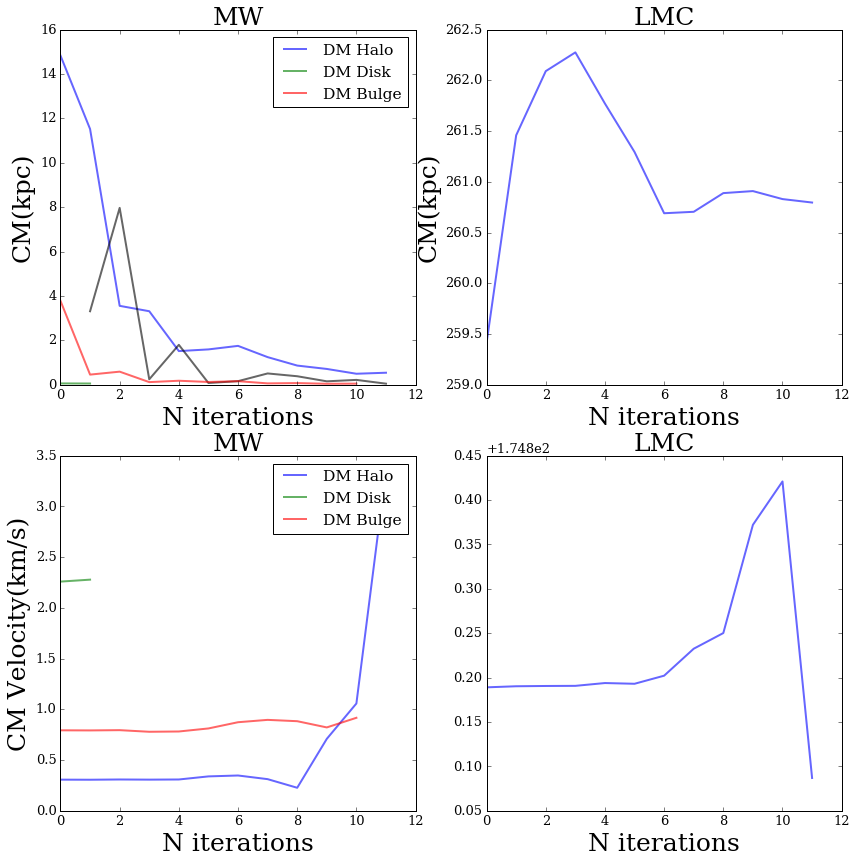

In [124]:
figure(figsize=(14, 14))

subplot(2, 2, 1)
plot(iterationmw, Rcmmw, lw=2, alpha=0.6, label='DM Halo')
plot(iterationmw[1:], RdifMW, lw=2, c='k', alpha=0.6)
plot(iterationdisk, Rdisk, lw=2, alpha=0.6, label='DM Disk')
plot(iterationbulge, Rbulge, lw=2, alpha=0.6, label='DM Bulge')
xlabel('N iterations', fontsize=25)
ylabel('CM(kpc)', fontsize=25)
title('MW', fontsize=25)
legend()

subplot(2, 2, 2)
plot(iterationlmc, Rlmc, lw=2, alpha=0.6)
#plot(iterationlmc[1:], Rdiflmc, lw=2, c='k', alpha=0.6)
xlabel('N iterations', fontsize=25)
ylabel('CM(kpc)', fontsize=25)
title('LMC', fontsize=25)

subplot(2, 2, 3)
plot(iterationmw, Vcmmw, lw=2, alpha=0.6, label='DM Halo')
#plot(iterationmw[1:], VdifMW, lw=2, c='k', alpha=0.6)
plot(iterationdisk, Vdisk, lw=2, alpha=0.6, label='DM Disk')
plot(iterationbulge, Vbulge, lw=2, alpha=0.6, label='DM Bulge')
xlabel('N iterations', fontsize=25)
ylabel('CM Velocity(km/s)', fontsize=25)
title('MW', fontsize=25)
legend()

subplot(2, 2, 4)
plot(iterationlmc, Vlmc, lw=2, alpha=0.6)
#plot(iterationlmc[1:], Vlmc, lw=2, c='k', alpha=0.6)
xlabel('N iterations', fontsize=25)
title('LMC', fontsize=25)


savefig('CM_computation_convergence.png', bbox_inches='tight')


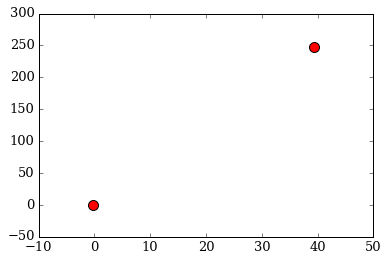

In [22]:
scatter(X_sim_mwCM[-1], Y_sim_mwCM[-1], c='r', s=100)
scatter(X_sim_lmcCM[-1], Y_sim_lmcCM[-1], c='r', s=100)

# Comparing the same snapshot with different resolution, Comparisson with the potential method

In [23]:
potbulge = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pot', 'bulge')
posbulge = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pos', 'bulge')
velbulge = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'vel', 'bulge')

pothalos = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pot', 'dm')
poshalos = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pos', 'dm')
velhalos = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'vel', 'dm')
idhalos = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pid', 'dm')


potdisk = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pot', 'disk')
posdisk = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'pos', 'disk')
veldisk = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4_a1H6HR_000", 'vel', 'disk')


Returning BULGE Potential
Returning BULGE Positions
Returning BULGE Velocities
Returning DM    Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Potential
Returning DISK  Positions
Returning DISK  Velocities


In [33]:
potbulgeLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'pot', 'bulge')
posbulgeLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'pos', 'bulge')
velbulgeLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'vel', 'bulge')

pothalosLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'pot', 'dm')
poshalosLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'pos', 'dm')
velhalosLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'vel', 'dm')
idhalosLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'pid', 'dm')


potdiskLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'pot', 'disk')
posdiskLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'pos', 'disk')
veldiskLR = readsnap("../../data/LMCMW/MW1LMC4/a1/MW1LMC4a1H6_000", 'vel', 'disk')

Returning BULGE Potential
Returning BULGE Positions
Returning BULGE Velocities
Returning DM    Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DISK  Potential
Returning DISK  Positions
Returning DISK  Velocities


In [60]:
# -------------------- High res -----------------

CMBpot = where(potbulge == min(potbulge))
XCMbulge, YCMbulge, ZCMbulge = posbulge[CMBpot, 0], posbulge[CMBpot, 1], posbulge[CMBpot, 2]

Xbulge, Ybulge, Zbulge = posbulge[:, 0], posbulge[:, 1], posbulge[:, 2]
vXbulge, vYbulge, vZbulge = velbulge[:, 0], velbulge[:, 1], velbulge[:, 2]

CMDpot = where(potdisk == min(potdisk))
XCMdisk, YCMdisk, ZCMdisk = posdisk[CMDpot, 0], posdisk[CMDpot, 1], posdisk[CMDpot, 2]

Xdisk, Ydisk, Zdisk = posdisk[:, 0], posdisk[:, 1], posdisk[:, 2]
vXdisk, vYdisk, vZdisk = veldisk[:, 0], veldisk[:, 1], veldisk[:, 2]

Xhalo, Yhalo, Zhalo = poshalos[:, 0], poshalos[:, 1], poshalos[:, 2]
vXhalo, vYhalo, vZhalo = velhalos[:, 0], velhalos[:, 1], velhalos[:, 2]

# -------------------- Low res -----------------

CMpotLR = where(potbulgeLR == min(potbulgeLR))
XCMbulgeLR, YCMbulgeLR, ZCMbulgeLR = posbulgeLR[CMpotLR, 0], posbulgeLR[CMpotLR, 1], posbulgeLR[CMpotLR, 2]

XbulgeLR, YbulgeLR, ZbulgeLR = posbulgeLR[:, 0], posbulgeLR[:, 1], posbulgeLR[:, 2]
vXbulgeLR, vYbulgeLR, vZbulgeLR = velbulgeLR[:, 0], velbulgeLR[:, 1], velbulgeLR[:, 2]

CMDpotLR = where(potdiskLR == min(potdiskLR))
XCMdiskLR, YCMdiskLR, ZCMdiskLR = posdisk[CMDpotLR, 0], posdisk[CMDpotLR, 1], posdisk[CMDpotLR, 2]

XdiskLR, YdiskLR, ZdiskLR = posdiskLR[:, 0], posdiskLR[:, 1], posdiskLR[:, 2]
vXdiskLR, vYdiskLR, vZdiskLR = veldiskLR[:, 0], veldiskLR[:, 1], veldiskLR[:, 2]

XhaloLR, YhaloLR, ZhaloLR = poshalosLR[:, 0], poshalosLR[:, 1], poshalosLR[:, 2]
vXhaloLR, vYhaloLR, vZhaloLR = velhalosLR[:, 0], velhalosLR[:, 1], velhalosLR[:, 2]

print XCMbulge, YCMbulge, ZCMbulge 
print XCMbulgeLR, YCMbulgeLR, ZCMbulgeLR 

[[-1.61738527]] [[-5.86820316]] [[-4.73749733]]
[[ 7.1663065]] [[ 6.00355339]] [[-4.12696266]]


## Bulge CM

In [126]:
xbulge, ybulge,zbulge, vxbulge, vybulge, vzbulge = CM(Xbulge, Ybulge, Zbulge, vXbulge, vYbulge, vZbulge, 0.01)
xbulgeLR, ybulgeLR, zbulgeLR, vxbulgeLR, vybulgeLR, vzbulgeLR = CM(XbulgeLR, YbulgeLR, ZbulgeLR, vXbulgeLR, vYbulgeLR, vZbulgeLR, 0.1)


2150
9928


In [41]:
#High Res
print xbulge[-1] - XCMbulge
print ybulge[-1] - YCMbulge
print zbulge[-1] - ZCMbulge
# Low res
print xbulgeLR[-1] - XCMbulgeLR
print ybulgeLR[-1] - YCMbulgeLR
print zbulgeLR[-1] - ZCMbulgeLR

[[-0.02869833]]
[[ 0.02588797]]
[[-0.00693893]]
[[-0.03883457]]
[[-0.06575966]]
[[-0.03263283]]


## Disk CM

## Halo CM

In [85]:
def LMCMWparticles(ids, NMW, x, y, z, vx, vy, vz, pot):
    X = sort(ids)
    limit = X[NMW]
    index_MW = where(ids<=limit)[0]
    index_LMC = where(ids>limit)[0]
    xmw, ymw, zmw = x[index_MW], y[index_MW], z[index_MW]
    vxmw, vymw, vzmw = vx[index_MW], vy[index_MW], vz[index_MW]
    xlmc, ylmc, zlmc = x[index_LMC], y[index_LMC], z[index_LMC]
    vxlmc, vylmc, vzlmc = vx[index_LMC], vy[index_LMC], vz[index_LMC]
    potmw = pot[index_MW]
    potlmc = pot[index_LMC]
    return xmw, ymw, zmw, vxmw, vymw, vzmw, xlmc, ylmc, zlmc, vxlmc, vylmc, vzlmc, potmw, potlmc


In [71]:
Xmwhalo, Ymwhalo, Zmwhalo, vXmwhalo, vYmwhalo, vZmwhalo, Xlmchalo,\
Ylmchalo, Zlmchalo, vXlmchalo, vYlmchalo, vZlmchalo, potMWhalo, potLMChalo\
= LMCMWparticles(idhalos, 299999, Xhalo, Yhalo, Zhalo, vXhalo, vYhalo, vZhalo, pothalos)


In [186]:
XmwhaloLR, YmwhaloLR, ZmwhaloLR, vXmwhaloLR, vYmwhaloLR, vZmwhaloLR, XlmchaloLR,\
YlmchaloLR, ZlmchaloLR, vXlmchaloLR, vYlmchaloLR, vZlmchaloLR, potMWhaloLR, potLMChaloLR\
= LMCMWparticles(idhalosLR, 29999, XhaloLR, YhaloLR, ZhaloLR, vXhaloLR, vYhaloLR, vZhaloLR, pothalosLR)


### Computing halo CM with positions

In [247]:
xmwhalo, ymwhalo, zmwhalo, vxmwhalo, vymwhalo, vzmwhalo, Rmwhalo = CM(Xmwhalo, Ymwhalo, Zmwhalo, vXmwhalo, vYmwhalo, vZmwhalo, 0.03)
xlmchalo, ylmchalo, zlmchalo, vxlmchalo, vylmchalo, vzlmchalo, Rlmchalo = CM(Xlmchalo, Ylmchalo, Zlmchalo, vXlmchalo, vYlmchalo, vZlmchalo, 0.1)


xmwhaloLR, ymwhaloLR, zmwhaloLR, vxmwhaloLR, vymwhaloLR, vzmwhaloLR, RmwhaloLR = CM(XmwhaloLR, YmwhaloLR, ZmwhaloLR, vXmwhaloLR, vYmwhaloLR, vZmwhaloLR, 0.3)
xlmchaloLR, ylmchaloLR, zlmchaloLR, vxlmchaloLR, vylmchaloLR, vzlmchaloLR, RlmchaloLR = CM(XlmchaloLR, YlmchaloLR, ZlmchaloLR, vXlmchaloLR, vYlmchaloLR, vZlmchaloLR, 0.1)


854
7179
116
7179


### Computing halo CM with the potential

In [248]:
CMHmwpot = where(potMWhalo == min(potMWhalo))
XCMHmw, YCMHmw, ZCMHmw = Xmwhalo[CMHmwpot], Ymwhalo[CMHmwpot], Zmwhalo[CMHmwpot]
vXCMHmw, vYCMHmw, vZCMHmw = vXmwhalo[CMHmwpot], vYmwhalo[CMHmwpot], vZmwhalo[CMHmwpot]

RCMHmw = np.sqrt(XCMHmw**2 + YCMHmw**2 + ZCMHmw**2)
VCMHmw = np.sqrt(vXCMHmw**2 + vYCMHmw**2 + vZCMHmw**2)


CMHmwpotLR = where(potMWhaloLR == min(potMWhaloLR))
XCMHmwLR, YCMHmwLR, ZCMHmwLR = XmwhaloLR[CMHmwpotLR], YmwhaloLR[CMHmwpotLR], ZmwhaloLR[CMHmwpotLR]
vXCMHmwLR, vYCMHmwLR, vZCMHmwLR = vXmwhaloLR[CMHmwpotLR], vYmwhaloLR[CMHmwpotLR], vZmwhaloLR[CMHmwpotLR]

RCMHmwLR = np.sqrt(XCMHmwLR**2 + YCMHmwLR**2 + ZCMHmwLR**2)
VCMHmwLR = np.sqrt(vXCMHmw**2 + vYCMHmw**2 + vZCMHmw**2)

In [249]:
Rcm_mwhalo = np.zeros(len(xmwhalo))
Rcm_lmchalo = np.zeros(len(xlmchalo))
RmwHalo = np.zeros(len(Rmwhalo))
RmwHaloLR = np.zeros(len(RmwhaloLR))


Vcm_mwhalo = np.zeros(len(xmwhalo))
Vcm_lmchalo = np.zeros(len(xlmchalo))

Rcm_mwhaloLR = np.zeros(len(xmwhaloLR))
Rcm_lmchaloLR = np.zeros(len(xlmchaloLR))

Vcm_mwhaloLR = np.zeros(len(xmwhaloLR))
Vcm_lmchaloLR = np.zeros(len(xlmchaloLR))



for i in range(len(xmwhalo)):
    Rcm_mwhalo[i] = np.sqrt(xmwhalo[i]**2 + ymwhalo[i]**2 + zmwhalo[i]**2)
    Vcm_mwhalo[i] = np.sqrt(vxmwhalo[i]**2 + vymwhalo[i]**2 + vzmwhalo[i]**2)
    Rcm_mwhaloLR[i] = np.sqrt(xmwhaloLR[i]**2 + ymwhaloLR[i]**2 + zmwhaloLR[i]**2)
    Vcm_mwhaloLR[i] = np.sqrt(vxmwhaloLR[i]**2 + vymwhaloLR[i]**2 + vzmwhaloLR[i]**2)
    RmwHalo[i] = Rmwhalo[i]
    RmwHaloLR[i] = RmwhaloLR[i]



for i in range(len(xlmchalo)):
    Rcm_lmchalo[i] = np.sqrt(xlmchalo[i]**2 + ylmchalo[i]**2 + zlmchalo[i]**2)
    Vcm_lmchalo[i] = np.sqrt(vxlmchalo[i]**2 + vylmchalo[i]**2 + vzlmchalo[i]**2)


In [250]:
print len(RmwHalo)
print len(Rcm_mwhalo)
print len(xmwhalo)

16
16
16


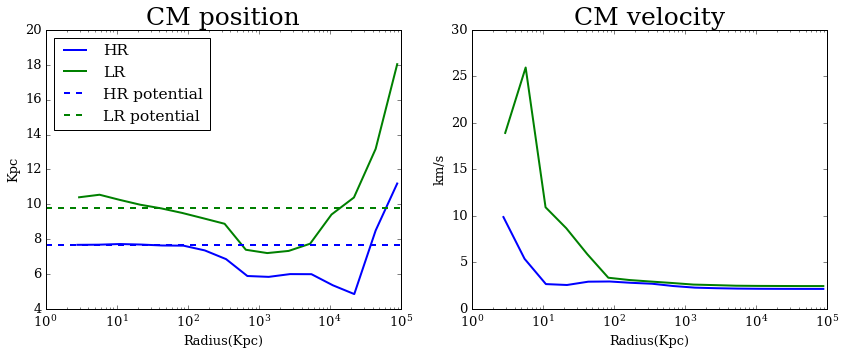

In [253]:
figure(figsize=(14, 5))
subplot(1, 2, 1)
title('CM position', fontsize=25)
plot(Rmwhalo, Rcm_mwhalo, lw=2, label='HR')
plot(RmwhaloLR, Rcm_mwhaloLR, lw=2, label='LR')
xscale('log')
axhline(RCMHmw, lw=2, ls='--', label='HR potential')
axhline(RCMHmwLR, lw=2, ls='--', c='g', label='LR potential')
xlabel('Radius(Kpc)')
ylabel('Kpc')
legend(loc='best')

subplot(1, 2, 2)
title('CM velocity', fontsize=25)
plot(Rmwhalo, Vcm_mwhalo, lw=2)
plot(RmwhaloLR, Vcm_mwhaloLR, lw=2)
#axhline(VCMHmw, lw=2, ls='--', label='HR potential')
#axhline(VCMHmwLR, lw=2, ls='--', c='g', label='LR potential')
xlabel('Radius(Kpc)')
ylabel('km/s')
xscale('log')

#axhline(RCMHmw, lw=2, alpha=0.6, c='k')
#axhline(RCMHmwLR, lw=2, alpha=0.6, c='k')
savefig('CM_comparison.png', bbox_inches='tight')

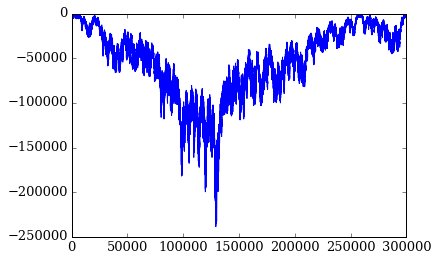

In [257]:
plot(potMWhalo)



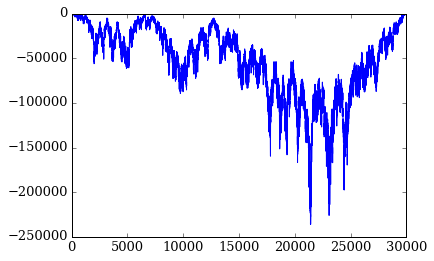

In [256]:
plot(potMWhaloLR)
